In [27]:
import pandas as pd
import numpy as np
import math
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np

In [28]:
yf.pdr_override()
stock= "MSFT"

startyear=2021
startmonth=6
startday=1
interval = "5m"

start=dt.datetime(startyear,startmonth,startday,)

now=dt.datetime.now()

df=pdr.get_data_yahoo(stock,start,now, interval=interval)

[*********************100%***********************]  1 of 1 completed


In [29]:
print(df.head())

                                 Open        High         Low       Close  \
Datetime                                                                    
2021-06-01 09:30:00-04:00  250.770004  251.089996  250.559998  250.615005   
2021-06-01 09:35:00-04:00  250.619995  250.720001  250.199997  250.490005   
2021-06-01 09:40:00-04:00  250.470001  250.785004  249.929993  249.996796   
2021-06-01 09:45:00-04:00  250.000000  250.199997  249.699997  249.820007   
2021-06-01 09:50:00-04:00  249.820007  249.839996  249.460007  249.613297   

                            Adj Close   Volume  
Datetime                                        
2021-06-01 09:30:00-04:00  250.615005  1099735  
2021-06-01 09:35:00-04:00  250.490005   551306  
2021-06-01 09:40:00-04:00  249.996796   443887  
2021-06-01 09:45:00-04:00  249.820007   383814  
2021-06-01 09:50:00-04:00  249.613297   307132  


In [30]:
ma1=50
ma2=100

df[stock + " Sma_" + str(ma1)] = df.iloc[:,4].rolling(window=ma1).mean()
df[stock + " Sma_" + str(ma2)] = df.iloc[:,4].rolling(window=ma2).mean()

In [31]:
print(df.tail())

                                 Open        High         Low       Close  \
Datetime                                                                    
2021-07-28 15:40:00-04:00  286.279999  286.640015  286.279999  286.619995   
2021-07-28 15:45:00-04:00  286.619995  286.640015  286.429993  286.519989   
2021-07-28 15:50:00-04:00  286.529999  286.690002  286.200012  286.390015   
2021-07-28 15:55:00-04:00  286.380005  286.529999  286.100006  286.220001   
2021-07-28 16:00:00-04:00  286.220001  286.220001  286.220001  286.220001   

                            Adj Close  Volume  MSFT Sma_50  MSFT Sma_100  
Datetime                                                                  
2021-07-28 15:40:00-04:00  286.619995  279953   286.601964    286.701691  
2021-07-28 15:45:00-04:00  286.519989  234961   286.572964    286.730691  
2021-07-28 15:50:00-04:00  286.390015  528062   286.554164    286.754991  
2021-07-28 15:55:00-04:00  286.220001  714497   286.537382    286.773391  
2021-07-28

In [32]:
#df['Status'] = '0'
#mask = (df[stock + " Sma_" + str(ma1)] > df[stock + " Sma_" + str(ma2)])
#df.loc[mask, 'Status'] = '1'
df["Status"] = np.where(df[stock + " Sma_" + str(ma1)] > df[stock + " Sma_" + str(ma2)], 1, 0)

In [33]:
print(df['Status'])

Datetime
2021-06-01 09:30:00-04:00    0
2021-06-01 09:35:00-04:00    0
2021-06-01 09:40:00-04:00    0
2021-06-01 09:45:00-04:00    0
2021-06-01 09:50:00-04:00    0
                            ..
2021-07-28 15:40:00-04:00    0
2021-07-28 15:45:00-04:00    0
2021-07-28 15:50:00-04:00    0
2021-07-28 15:55:00-04:00    0
2021-07-28 16:00:00-04:00    0
Name: Status, Length: 3197, dtype: int64


In [34]:
df['Long']=df['Close'].pct_change()*df['Status']
print(df.tail(5))

                                 Open        High         Low       Close  \
Datetime                                                                    
2021-07-28 15:40:00-04:00  286.279999  286.640015  286.279999  286.619995   
2021-07-28 15:45:00-04:00  286.619995  286.640015  286.429993  286.519989   
2021-07-28 15:50:00-04:00  286.529999  286.690002  286.200012  286.390015   
2021-07-28 15:55:00-04:00  286.380005  286.529999  286.100006  286.220001   
2021-07-28 16:00:00-04:00  286.220001  286.220001  286.220001  286.220001   

                            Adj Close  Volume  MSFT Sma_50  MSFT Sma_100  \
Datetime                                                                   
2021-07-28 15:40:00-04:00  286.619995  279953   286.601964    286.701691   
2021-07-28 15:45:00-04:00  286.519989  234961   286.572964    286.730691   
2021-07-28 15:50:00-04:00  286.390015  528062   286.554164    286.754991   
2021-07-28 15:55:00-04:00  286.220001  714497   286.537382    286.773391   
2021

In [35]:
print(df['Long'].tail(5))

Datetime
2021-07-28 15:40:00-04:00    0.0
2021-07-28 15:45:00-04:00   -0.0
2021-07-28 15:50:00-04:00   -0.0
2021-07-28 15:55:00-04:00   -0.0
2021-07-28 16:00:00-04:00    0.0
Name: Long, dtype: float64


In [36]:
df['Strategy']=(df['Long']+1).cumprod()
print(df.tail(5))

                                 Open        High         Low       Close  \
Datetime                                                                    
2021-07-28 15:40:00-04:00  286.279999  286.640015  286.279999  286.619995   
2021-07-28 15:45:00-04:00  286.619995  286.640015  286.429993  286.519989   
2021-07-28 15:50:00-04:00  286.529999  286.690002  286.200012  286.390015   
2021-07-28 15:55:00-04:00  286.380005  286.529999  286.100006  286.220001   
2021-07-28 16:00:00-04:00  286.220001  286.220001  286.220001  286.220001   

                            Adj Close  Volume  MSFT Sma_50  MSFT Sma_100  \
Datetime                                                                   
2021-07-28 15:40:00-04:00  286.619995  279953   286.601964    286.701691   
2021-07-28 15:45:00-04:00  286.519989  234961   286.572964    286.730691   
2021-07-28 15:50:00-04:00  286.390015  528062   286.554164    286.754991   
2021-07-28 15:55:00-04:00  286.220001  714497   286.537382    286.773391   
2021

In [37]:
df['BuynHold']=(df['Close'].pct_change()+1).cumprod()
print(df.tail(5))

                                 Open        High         Low       Close  \
Datetime                                                                    
2021-07-28 15:40:00-04:00  286.279999  286.640015  286.279999  286.619995   
2021-07-28 15:45:00-04:00  286.619995  286.640015  286.429993  286.519989   
2021-07-28 15:50:00-04:00  286.529999  286.690002  286.200012  286.390015   
2021-07-28 15:55:00-04:00  286.380005  286.529999  286.100006  286.220001   
2021-07-28 16:00:00-04:00  286.220001  286.220001  286.220001  286.220001   

                            Adj Close  Volume  MSFT Sma_50  MSFT Sma_100  \
Datetime                                                                   
2021-07-28 15:40:00-04:00  286.619995  279953   286.601964    286.701691   
2021-07-28 15:45:00-04:00  286.519989  234961   286.572964    286.730691   
2021-07-28 15:50:00-04:00  286.390015  528062   286.554164    286.754991   
2021-07-28 15:55:00-04:00  286.220001  714497   286.537382    286.773391   
2021

<AxesSubplot:xlabel='Datetime'>

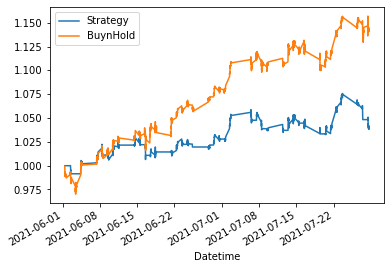

In [26]:
df[['Strategy', 'BuynHold']].plot()